In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from qutip import *
from scipy.constants import h, hbar, k as kb
from itertools import product
from scipy import optimize
from importlib import reload
import pickle
import logging

logging.getLogger().setLevel(logging.WARNING)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import Transmon
reload(Transmon)
from Transmon import *

import TransmonControl
reload(TransmonControl)
from TransmonControl import *

import DoubleTransmonSystem
reload(DoubleTransmonSystem)
from DoubleTransmonSystem import *

import Sidebands
reload(Sidebands)
from Sidebands import *

import TwoToneSimulation
reload(TwoToneSimulation)
from TwoToneSimulation import *

In [3]:
## Double Transmon System parameters (manually fitted with care)
Nc = 7

Ec1 = 0.22 *2* np.pi 
Ec2 = 0.22 *2* np.pi # used to be 0.23
Ecc = 0.004 * 2 * np.pi # 1.2 is my estimate for n_{ge} matrix element # was 0.005/1.2 **2
Ej1 = 24.3 *2* np.pi
Ej2 = 18.2 *2* np.pi
d = 0.7

T1_1, T2_1 = 10e3, 5e3
T1_2, T2_2 = 5e3, 1e3

tr1 = Transmon(Ec1, Ej1, d, 1/T1_1, 1/T2_1, Nc, 1)
tr2 = Transmon(Ec2, Ej2, d, 1/T1_2, 1/T2_2, Nc, 2)

#TC = TransmonControl(tr1)
dts = DoubleTransmonSystem(tr1, tr2, Ecc)

SweetSpot1 = 4.14 #4.14
SweetSpot2 = 4.12

T1 = 11.0 #higher "\/" #11.1 #periods of the spectrum curves
T2 = 6.4 #lower "/\    #6.4 

### Two-tone plot

In [42]:
dyn = TwoToneSimulation(dts, SweetSpot1, SweetSpot2,T1, T2)
dyn.H = dyn.generate_H
dyn.steady = dyn.steady_full
dyn.set_amps(0.1, 0.1)
dyn.set_grid(2, 6, 5.1, 5.5, 51, 51)
dyn.generate_caches()

Generating caches...
OK

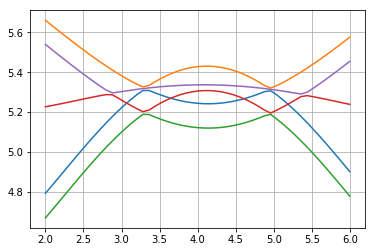

In [43]:
dts.plot_spectrum(dyn.phi1s, dyn.phi2s, currents=dyn.currs)

In [44]:
A = dyn.run(2) #points chosen with

In [46]:
nstate = 0
data = []
for i in range(0, len(dyn.currs)):
    row = []
    for j in range(0, len(dyn.freqs)):  # range (0, self.Lf, self.Lf//self.res_f):
        row.append(dyn.spec[i][j][nstate][0][nstate].real)  ## [i][j] correct
    data.append(row)

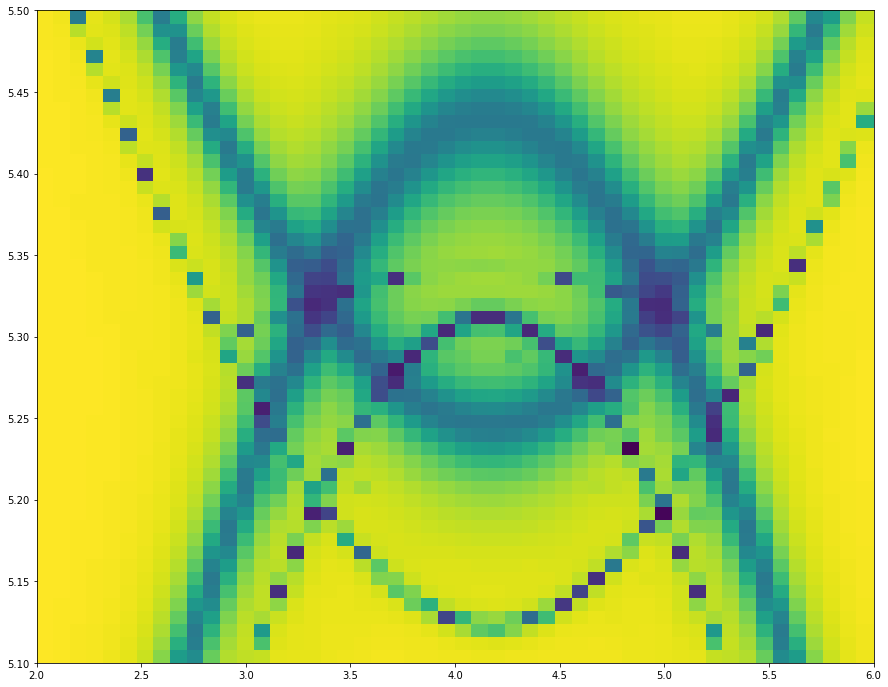

In [52]:
pcolormesh(dyn.currs, dyn.freqs, (array(data).T))
plt.gcf().set_size_inches(15,12)

### AT splitting direct observation

In [129]:
import ATSimulation
reload(ATSimulation)
from ATSimulation import *

In [130]:
ATS = ATSimulation(dts, SweetSpot1, SweetSpot2, T1, T2)

In [131]:
ATS.set_amplitudes(0.1, 0.01)
ATS.set_grid(linspace(5.21, 5.33, 51), linspace(5.21, 5.33, 51))
ATS.set_fluxes_from_current(3.65)

In [132]:
ATS.generate_caches()

In [133]:
dts.H(ATS.phi1, ATS.phi2)/2/pi

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.05538370e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 5.39192505e+00 0.00000000e+00 6.05538370e-03
  0.00000000e+00 8.36562079e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.05400967e+01 0.00000000e+00
  8.36562079e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 6.05538370e-03 0.00000000e+00 5.26913379e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 8.36034012e-03
  0.00000000e+00]
 [6.05538370e-03 0.00000000e+00 8.36562079e-03 0.00000000e+00
  1.06610588e+01 0.00000000e+00 8.36034012e-03 0.00000000e+00
  1.15499593e-02]
 [0.00000000e+00 8.36562079e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.58092304e+01 0.00000000e+00 1.15499593e-02
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000

In [134]:
mesolve(ATS.H(), dts.gg_state(ATS.phi1, ATS.phi2), 
        linspace(0, 100, 2), 
        c_ops = dts.c_ops(ATS.phi1, ATS.phi2), args = {"wd2":ATS.freq1}, progress_bar=True,
        options= ATS.options)

50.0%. Run time:   0.12s. Est. time left: 00:00:00:00
Total run time:   0.12s


Result object with mesolve data.
--------------------------------
states = True
num_collapse = 0

In [136]:
ATS.run(2)

Propagation time: 416.66666666671256 ns
Propagation time: 416.66666666671256 ns


Propagation time: 208.33333333331774 ns
Propagation time: 416.66666666655834 ns
Propagation time: 138.88888888888704 ns
Propagation time: 104.1666666666685 ns
Propagation time: 208.33333333331774 ns
Propagation time: 83.33333333333634 ns
Propagation time: 138.88888888888704 ns
Propagation time: 69.44444444444352 ns
Propagation time: 59.52380952380979 ns
Propagation time: 104.1666666666685 ns
Propagation time: 52.08333333333425 ns
Propagation time: 83.33333333333017 ns
Propagation time: 46.29629629629569 ns
Propagation time: 41.66666666666663 ns
Propagation time: 69.44444444444352 ns
Propagation time: 37.87878787878823 ns
Propagation time: 59.52380952380979 ns
Propagation time: 34.72222222222176 ns
Propagation time: 52.083333333331844 ns
Propagation time: 32.05128205128193 ns
Propagation time: 29.761904761904894 ns
Propagation time: 46.29629629629569 ns
Propagation time: 27.77777777777741 ns
Propagation time: 41.66666666666663 ns
Propagation time: 26.041666666666522 ns
Propagation time:

Propagation time: 208.33333333331774 ns
Propagation time: 416.66666666655834 ns
Propagation time: 138.88888888888704 ns
Propagation time: 104.1666666666685 ns
Propagation time: 83.33333333333017 ns
Propagation time: 208.33333333331774 ns
Propagation time: 69.44444444444352 ns
Propagation time: 59.52380952380979 ns
Propagation time: 138.88888888888704 ns
Propagation time: 52.083333333331844 ns
Propagation time: 46.29629629629569 ns
Propagation time: 104.16666666665887 ns
Propagation time: 41.66666666666663 ns
Propagation time: 83.33333333333017 ns
Propagation time: 37.87878787878695 ns
Propagation time: 34.72222222222176 ns
Propagation time: 69.44444444444352 ns
Propagation time: 32.05128205128193 ns
Propagation time: 59.52380952380664 ns
Propagation time: 29.761904761904894 ns
Propagation time: 52.083333333331844 ns
Propagation time: 27.77777777777741 ns
Propagation time: 26.041666666666522 ns
Propagation time: 46.29629629629569 ns
Propagation time: 24.509803921568658 ns
Propagation ti

Propagation time: 208.33333333331774 ns
Propagation time: 138.88888888888704 ns
Propagation time: 416.66666666671256 ns
Propagation time: 104.16666666665887 ns
Propagation time: 83.33333333333017 ns
Propagation time: 208.33333333335628 ns
Propagation time: 69.44444444444352 ns
Propagation time: 59.52380952380664 ns
Propagation time: 138.88888888888704 ns
Propagation time: 52.083333333331844 ns
Propagation time: 46.29629629629569 ns
Propagation time: 104.1666666666685 ns
Propagation time: 41.66666666666663 ns
Propagation time: 37.87878787878695 ns
Propagation time: 83.33333333333634 ns
Propagation time: 34.72222222222176 ns
Propagation time: 69.44444444444352 ns
Propagation time: 32.05128205128193 ns
Propagation time: 29.761904761904105 ns
Propagation time: 59.52380952380979 ns
Propagation time: 27.77777777777741 ns
Propagation time: 52.08333333333425 ns
Propagation time: 26.041666666666522 ns
Propagation time: 46.29629629629759 ns
Propagation time: 24.509803921568658 ns
Propagation tim

Propagation time: 208.33333333335628 ns
Propagation time: 138.88888888888704 ns
Propagation time: 416.66666666671256 ns
Propagation time: 104.1666666666685 ns
Propagation time: 83.33333333333634 ns
Propagation time: 208.33333333331774 ns
Propagation time: 69.44444444444781 ns
Propagation time: 59.52380952380979 ns
Propagation time: 52.08333333333425 ns
Propagation time: 138.88888888888704 ns
Propagation time: 46.29629629629759 ns
Propagation time: 104.1666666666685 ns
Propagation time: 41.66666666666663 ns
Propagation time: 37.87878787878823 ns
Propagation time: 83.33333333333634 ns
Propagation time: 34.72222222222283 ns
Propagation time: 69.44444444444352 ns
Propagation time: 32.05128205128285 ns
Propagation time: 29.761904761904894 ns
Propagation time: 59.52380952380979 ns
Propagation time: 27.777777777778095 ns
Propagation time: 52.08333333333425 ns
Propagation time: 26.041666666667126 ns
Propagation time: 24.509803921568658 ns
Propagation time: 46.29629629629569 ns
Propagation time

Propagation time: 208.33333333335628 ns
Propagation time: 138.88888888888704 ns
Propagation time: 416.66666666671256 ns
Propagation time: 104.1666666666685 ns
Propagation time: 83.33333333333634 ns
Propagation time: 208.33333333331774 ns
Propagation time: 69.44444444444352 ns
Propagation time: 59.52380952380979 ns
Propagation time: 138.88888888888704 ns
Propagation time: 52.08333333333425 ns
Propagation time: 46.29629629629759 ns
Propagation time: 104.1666666666685 ns
Propagation time: 41.66666666666663 ns
Propagation time: 37.87878787878823 ns
Propagation time: 83.33333333333017 ns
Propagation time: 34.72222222222283 ns
Propagation time: 69.44444444444352 ns
Propagation time: 32.05128205128193 ns
Propagation time: 29.761904761904894 ns
Propagation time: 59.52380952380979 ns
Propagation time: 27.777777777778095 ns
Propagation time: 52.08333333333425 ns
Propagation time: 26.041666666666522 ns
Propagation time: 46.29629629629569 ns
Propagation time: 24.509803921568658 ns
Propagation time

Propagation time: 208.33333333331774 ns
Propagation time: 416.66666666655834 ns
Propagation time: 138.88888888888704 ns
Propagation time: 104.1666666666685 ns
Propagation time: 83.33333333333634 ns
Propagation time: 208.33333333331774 ns
Propagation time: 69.44444444444352 ns
Propagation time: 59.52380952380979 ns
Propagation time: 138.88888888888704 ns
Propagation time: 52.08333333333425 ns
Propagation time: 46.29629629629569 ns
Propagation time: 104.1666666666685 ns
Propagation time: 41.66666666666663 ns
Propagation time: 37.87878787878823 ns
Propagation time: 83.33333333333017 ns
Propagation time: 34.72222222222176 ns
Propagation time: 69.44444444444352 ns
Propagation time: 32.05128205128193 ns
Propagation time: 29.761904761904894 ns
Propagation time: 59.52380952380979 ns
Propagation time: 27.77777777777741 ns
Propagation time: 52.083333333331844 ns
Propagation time: 26.041666666666522 ns
Propagation time: 24.509803921568658 ns
Propagation time: 46.29629629629569 ns
Propagation time

Propagation time: 208.33333333331774 ns
Propagation time: 138.88888888888704 ns
Propagation time: 416.66666666655834 ns
Propagation time: 104.1666666666685 ns
Propagation time: 83.33333333333017 ns
Propagation time: 69.44444444444352 ns
Propagation time: 208.33333333331774 ns
Propagation time: 59.52380952380979 ns
Propagation time: 52.083333333331844 ns
Propagation time: 138.88888888888704 ns
Propagation time: 46.29629629629569 ns
Propagation time: 41.66666666666663 ns
Propagation time: 104.16666666665887 ns
Propagation time: 37.87878787878695 ns
Propagation time: 34.72222222222176 ns
Propagation time: 83.33333333333017 ns
Propagation time: 32.05128205128193 ns
Propagation time: 29.761904761904894 ns
Propagation time: 69.44444444444352 ns
Propagation time: 27.77777777777741 ns
Propagation time: 59.52380952380664 ns
Propagation time: 26.041666666666522 ns
Propagation time: 52.083333333331844 ns
Propagation time: 24.509803921568658 ns
Propagation time: 23.148148148147843 ns
Propagation t

Propagation time: 208.33333333331774 ns
Propagation time: 138.88888888888704 ns
Propagation time: 416.66666666671256 ns
Propagation time: 104.16666666665887 ns
Propagation time: 83.33333333333017 ns
Propagation time: 69.44444444444352 ns
Propagation time: 208.33333333335628 ns
Propagation time: 59.52380952380664 ns
Propagation time: 52.083333333331844 ns
Propagation time: 138.88888888888704 ns
Propagation time: 46.29629629629569 ns
Propagation time: 41.66666666666663 ns
Propagation time: 104.1666666666685 ns
Propagation time: 37.87878787878695 ns
Propagation time: 34.72222222222176 ns
Propagation time: 83.33333333333634 ns
Propagation time: 32.05128205128193 ns
Propagation time: 29.761904761904105 ns
Propagation time: 69.44444444444352 ns
Propagation time: 27.77777777777741 ns
Propagation time: 59.52380952380979 ns
Propagation time: 26.041666666666522 ns
Propagation time: 24.509803921568658 ns
Propagation time: 52.08333333333425 ns
Propagation time: 23.148148148147843 ns
Propagation ti

Propagation time: 208.33333333335628 ns
Propagation time: 138.88888888888704 ns
Propagation time: 416.66666666671256 ns
Propagation time: 104.1666666666685 ns
Propagation time: 83.33333333333634 ns
Propagation time: 69.44444444444781 ns
Propagation time: 208.33333333331774 ns
Propagation time: 59.52380952380979 ns
Propagation time: 52.08333333333425 ns
Propagation time: 46.29629629629759 ns
Propagation time: 138.88888888888704 ns
Propagation time: 41.66666666666663 ns
Propagation time: 37.87878787878823 ns
Propagation time: 104.1666666666685 ns
Propagation time: 34.72222222222283 ns
Propagation time: 83.33333333333634 ns
Propagation time: 32.05128205128285 ns
Propagation time: 29.761904761904894 ns
Propagation time: 69.44444444444352 ns
Propagation time: 27.777777777778095 ns
Propagation time: 26.041666666667126 ns
Propagation time: 59.52380952380979 ns
Propagation time: 24.509803921568658 ns
Propagation time: 52.08333333333425 ns
Propagation time: 23.14814814814832 ns
Propagation time

Propagation time: 208.33333333335628 ns
Propagation time: 138.88888888888704 ns
Propagation time: 416.66666666671256 ns
Propagation time: 104.1666666666685 ns
Propagation time: 83.33333333333634 ns
Propagation time: 69.44444444444352 ns
Propagation time: 208.33333333331774 ns
Propagation time: 59.52380952380979 ns
Propagation time: 52.08333333333425 ns
Propagation time: 46.29629629629759 ns
Propagation time: 138.88888888888704 ns
Propagation time: 41.66666666666663 ns
Propagation time: 37.87878787878823 ns
Propagation time: 104.1666666666685 ns
Propagation time: 34.72222222222283 ns
Propagation time: 83.33333333333017 ns
Propagation time: 32.05128205128193 ns
Propagation time: 29.761904761904894 ns
Propagation time: 69.44444444444352 ns
Propagation time: 10.964912280701787 ns
Propagation time: 11.261261261261263 ns
Propagation time: 59.52380952380979 ns
Propagation time: 11.57407407407416 ns
Propagation time: 11.904761904761957 ns
Propagation time: 52.08333333333425 ns
Propagation time

Propagation time: 208.33333333331774 ns
Propagation time: 138.88888888888704 ns
Propagation time: 416.66666666655834 ns
Propagation time: 104.1666666666685 ns
Propagation time: 83.33333333333634 ns
Propagation time: 69.44444444444352 ns
Propagation time: 208.33333333331774 ns
Propagation time: 59.52380952380979 ns
Propagation time: 52.08333333333425 ns
Propagation time: 46.29629629629569 ns
Propagation time: 138.88888888888704 ns
Propagation time: 41.66666666666663 ns
Propagation time: 9.920634920634877 ns
Propagation time: 104.1666666666685 ns
Propagation time: 10.162601626016187 ns
Propagation time: 10.416666666666657 ns
Propagation time: 10.683760683760644 ns
Propagation time: 83.33333333333017 ns
Propagation time: 10.96491228070168 ns
Propagation time: 11.26126126126115 ns
Propagation time: 11.57407407407404 ns
Propagation time: 69.44444444444352 ns
Propagation time: 11.90476190476183 ns
Propagation time: 12.254901960784196 ns
Propagation time: 59.52380952380979 ns
Propagation time

Propagation time: 208.33333333331774 ns
Propagation time: 138.88888888888704 ns
Propagation time: 416.66666666655834 ns
Propagation time: 104.1666666666685 ns
Propagation time: 83.33333333333017 ns
Propagation time: 69.44444444444352 ns
Propagation time: 208.33333333331774 ns
Propagation time: 9.05797101449273 ns
Propagation time: 9.259259259259213 ns
Propagation time: 9.469696969696978 ns
Propagation time: 9.689922480620139 ns
Propagation time: 138.88888888888704 ns
Propagation time: 9.920634920634877 ns
Propagation time: 10.162601626016187 ns
Propagation time: 10.416666666666657 ns
Propagation time: 104.16666666665887 ns
Propagation time: 10.683760683760644 ns
Propagation time: 10.96491228070168 ns
Propagation time: 11.261261261261263 ns
Propagation time: 83.33333333333017 ns
Propagation time: 11.57407407407404 ns
Propagation time: 11.90476190476183 ns
Propagation time: 12.254901960784329 ns
Propagation time: 8.865248226950353 ns
Propagation time: 12.626262626262601 ns
Propagation ti

Propagation time: 208.33333333331774 ns
Propagation time: 416.66666666671256 ns
Propagation time: 8.333333333333327 ns
Propagation time: 8.50340136054419 ns
Propagation time: 8.680555555555575 ns
Propagation time: 8.865248226950353 ns
Propagation time: 9.05797101449273 ns
Propagation time: 9.259259259259213 ns
Propagation time: 9.469696969696978 ns
Propagation time: 9.689922480620139 ns
Propagation time: 9.920634920634877 ns
Propagation time: 10.16260162601628 ns
Propagation time: 10.416666666666657 ns
Propagation time: 10.683760683760644 ns
Propagation time: 10.964912280701787 ns
Propagation time: 11.261261261261263 ns
Propagation time: 11.57407407407404 ns
Propagation time: 11.904761904761957 ns
Propagation time: 12.254901960784329 ns
Propagation time: 12.626262626262601 ns
Propagation time: 13.020833333333261 ns
Propagation time: 13.4408602150538 ns
Propagation time: 13.888888888888877 ns
Propagation time: 14.367816091953955 ns
Propagation time: 14.880952380952447 ns
Propagation tim

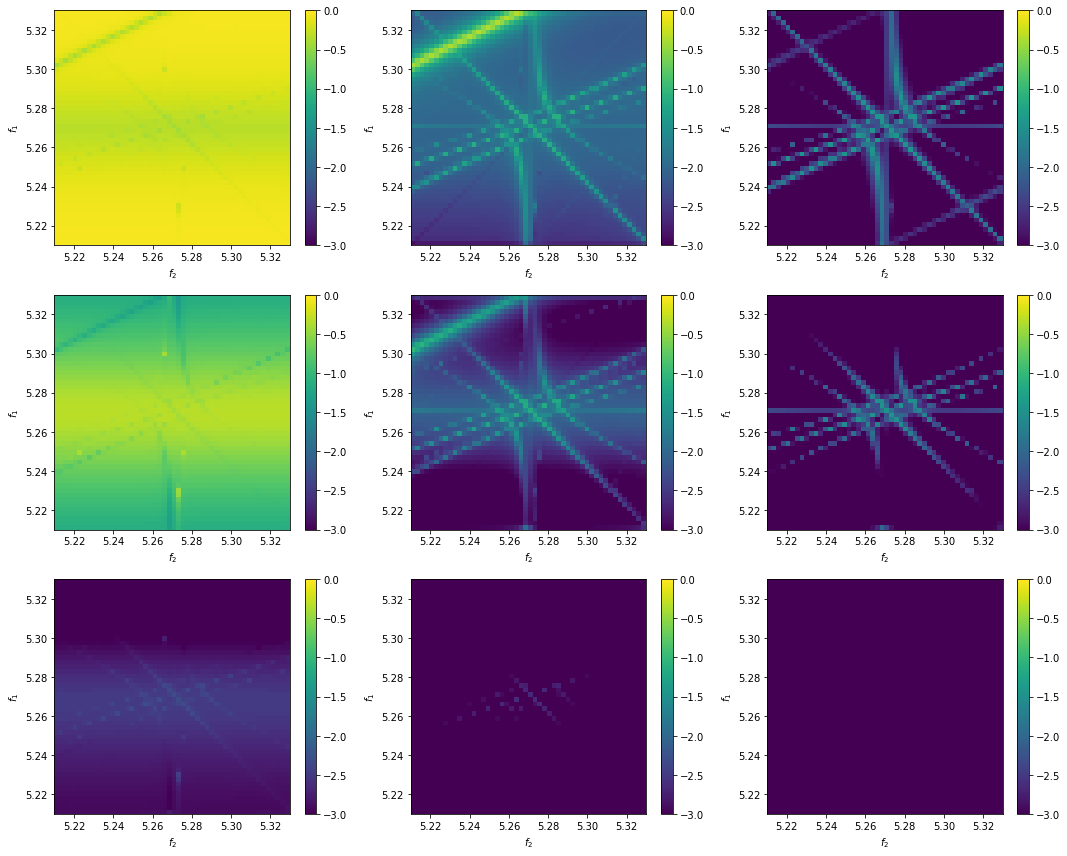

In [218]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for i in range(3):
    for j in range(3):
        nstate = 3*i+j
        data = []
        for k in range(0, len(ATS.freq1s)):
            row = []
            for m in range(0, len(ATS.freq2s)):  # range (0, self.Lf, self.Lf//self.res_f):
                row.append(ATS.spec[k][m][nstate][0][nstate].real)  ## [i][j] correct
            data.append(row)
        
        m = axes[i,j].pcolormesh(ATS.freq2s, ATS.freq1s, log10(array(data).T), vmax=0, vmin=-3)
        axes[i,j].set_ylabel("$f_1$")
        axes[i,j].set_xlabel("$f_2$")
        plt.colorbar(m ,ax = axes[i,j])
#         axes[i,j].grid()
plt.tight_layout()

In [203]:
nstate = 8
data = []
for i in range(0, len(ATS.freq1s)):
    row = []
    for j in range(0, len(ATS.freq2s)):  # range (0, self.Lf, self.Lf//self.res_f):
        row.append(ATS.spec[i][j][nstate][0][nstate].real)  ## [i][j] correct
    data.append(row)

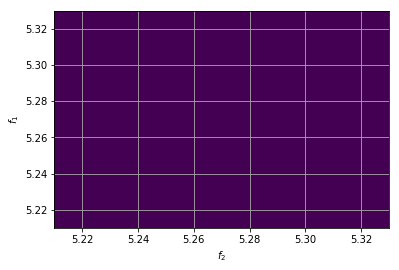

In [173]:
0.1/2/pi*2

0.03183098861837907